# PRÁCTICA INTEGRADORA: VISUALIZACIÓN EN PYTHON

## Spesot Adrián

In [1]:
# Librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

pd.set_option('display.max_columns', None)


## 1 - Cargar archivo en Python. Realizar estadísticas descriptivas básicas



In [2]:
df_HR = pd.DataFrame(pd.read_csv('HRDataset_v14.csv'))

df_HR

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,0,20,Production Technician II,MA,1810,05/11/85,M,Single,US Citizen,No,White,7/7/2014,NaN,N/A-StillEmployed,Active,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,1,19,Production Technician I,MA,2458,05/04/82,F,Single,US Citizen,No,Asian,9/2/2008,9/29/2015,Another position,Voluntarily Terminated,Production,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,0,6,CIO,MA,2067,08/30/79,F,Single,US Citizen,No,White,4/10/2010,NaN,N/A-StillEmployed,Active,IT/IS,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,0,9,Data Analyst,MA,2148,02/24/79,F,Single,US Citizen,No,White,3/30/2015,NaN,N/A-StillEmployed,Active,IT/IS,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


### Realizar estadísticas descriptivas básicas

In [3]:
''' A modo resumen, muestro un dataframe segmentado por Departamente, indicando la cantidad de puestos que contiene cada uno
y la media de salario que tiene ese departamenteo específico
'''

salario_agrupado = df_HR.groupby(['Department'])\
                        .aggregate({'Employee_Name':'count','Salary':'mean'})\
                        .reset_index()\
                        .rename(columns={'Department':'Departamentos','Employee_Name':'Cant_Puesto','Salary':'Salario'})

salario_agrupado

,Departamentos,Cant_Puesto,Salario
0,Admin Offices,9,71791.888889
1,Executive Office,1,250000.000000
2,IT/IS,50,97064.640000
3,Production,209,59953.545455
4,Sales,31,69061.258065
5,Software Engineering,11,94989.454545


In [4]:
'''Usare la funcion describe() para un análisis descriptivo rápido y extraeremos la columna Salario.
Podemos ver que existen 311 empleados/puestos y se observa la media, la desviacion estandar, el minimo y maximo de salario
y de los cuartiles de la muestra, es decir los valores comprendidos en el 25%, 50% y 75% de la muestra
'''

df_HR[['Salary']].describe().round(2)

,Salary
count,311.00
mean,69020.68
std,25156.64
min,45046.00
25%,55501.50
50%,62810.00
75%,72036.00
max,250000.00


##  2 - Realizar un histograma con los salarios. Qué rango(s) de salarios son los más populares?


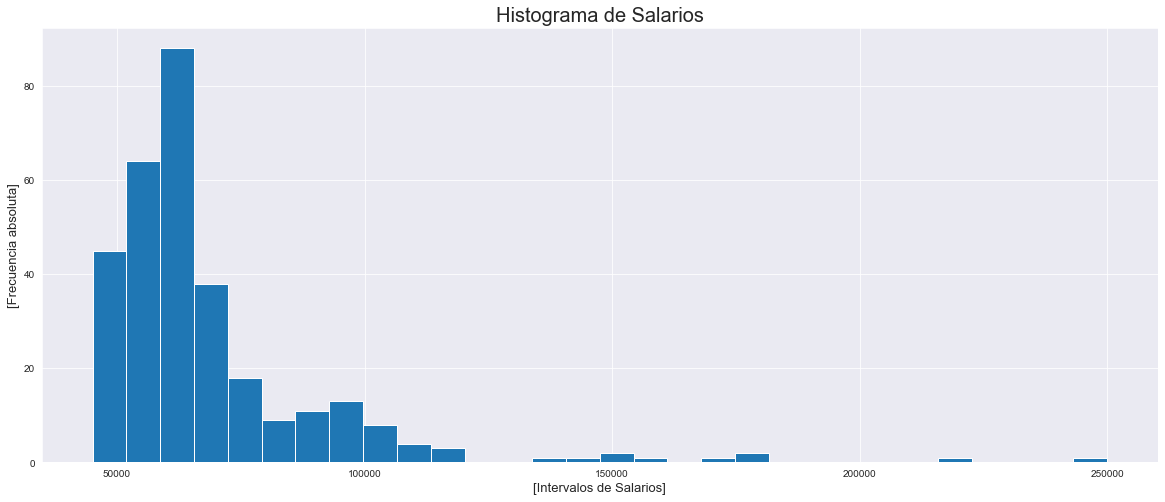

In [29]:
sns.set_style('darkgrid') # Coloco el fondo de la grilla color oscuro
fig, ax = plt.subplots(figsize=(20, 8))
ax.hist(df_HR['Salary'].values.flatten(), bins=30)
ax.set_title('Histograma de Salarios',fontsize=20)
ax.set_xlabel('[Intervalos de Salarios]',fontsize=13)
ax.set_ylabel('[Frecuencia absoluta]',fontsize=13)
plt.grid(True)

plt.show()

## 3 - Realizar un gráfico de violín con los salarios, discriminados por género. 


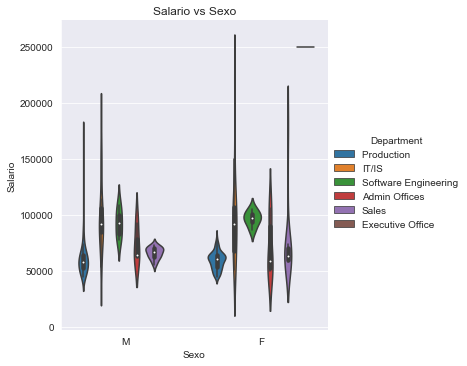

In [30]:
# En el siguiente grafico realizo la discriminacion de los salarios por genero
# Ademas reagrupo los salarios por Departamentos.

ax = sns.catplot(data=df_HR, kind='violin', x='Sex',  
                 y='Salary',hue='Department',split=False)

ax.set(xlabel='Sexo', ylabel='Salario',
       title='Salario vs Sexo')



## 4 - Graficar la serie de tiempo correspondiente a la fecha de contratación (DateofHire)

In [7]:
# Creo un dataset con la fecha y la cantidad de contrataciones realizadas
# Cambio de tipo de dato a la columna DateofHire con el comando pd.to_datetime(df_HR['DateofHire'], y agrupo por este campo con groupby
# aggregate uso para agregar una columna con el conteo de 
Serie_Tiempo_Contrataciones = df_HR.groupby(pd.to_datetime(df_HR['DateofHire']))\
                            .aggregate({'EmpID':'count'})\
                            .reset_index()\
                            .rename(columns={'EmpID':'Cantidades'})\
                            .sort_values(by=['DateofHire'], ascending=True)
Serie_Tiempo_Contrataciones

,DateofHire,Cantidades
0,2006-01-09,1
1,2007-06-25,1
2,2007-11-05,1
3,2008-01-07,1
4,2008-09-02,1
...,...,...
96,2017-01-07,1
97,2017-02-10,1
98,2017-02-15,2
99,2017-04-20,2


In [8]:
# Designo las variables de los ejes x e y
x = Serie_Tiempo_Contrataciones['DateofHire']
y = Serie_Tiempo_Contrataciones['Cantidades']

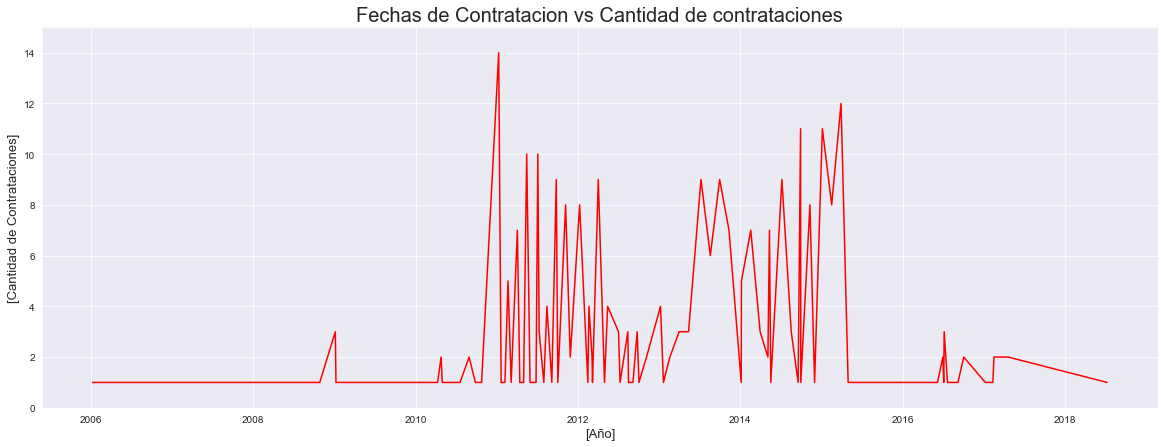

In [25]:
#usamos subplot para graficar
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(20, 7))  
ax.plot(x, y,'r')
ax.set_xlabel('[Año]',fontsize=13)#Etiqueta eje x
ax.set_ylabel('[Cantidad de Contrataciones]', fontsize=13) # Etiqueta eje y
ax.set_title('Fechas de Contratacion vs Cantidad de contrataciones',fontsize=20) # Título
plt.ylim(0,15)
plt.grid('white')
